# Multivariate linear regression
using python package statsmodels

In [42]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, str(Path.cwd().parent))
from src.utils import *

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preparing Your Data: 
Make sure your data is in a suitable format. Typically, you'll have a pandas DataFrame with one column as the dependent variable (the outcome you're interested in predicting) and the other columns as independent variables (the predictors).

In [47]:
DATA_FOLDER = "../data/final/"
ihd_df = pd.read_csv(DATA_FOLDER + "gbd_IschemicHeartDisease_DeathsIncidence.csv")
ihd_df.rename(columns={'year': 'Year'}, inplace=True)
ihd_df = ihd_df[ihd_df['measure_name'] == 'Incidence']
ihd_df['Country Code'] = ihd_df['location_name'].apply(get_iso3_gbd)
ihd_df.head()

,measure_name,location_name,cause_name,Year,Value,upper,lower,Country Code
6180,Incidence,Samoa,Ischemic heart disease,1990,105.415246,120.256198,91.170105,WSM
6181,Incidence,Samoa,Ischemic heart disease,1991,106.893237,122.099620,92.535224,WSM
6182,Incidence,Samoa,Ischemic heart disease,1992,108.300825,124.031474,93.739971,WSM
6183,Incidence,Samoa,Ischemic heart disease,1993,109.719828,125.526585,95.309143,WSM
6184,Incidence,Samoa,Ischemic heart disease,1994,111.149369,126.996050,96.416925,WSM


In [3]:
fat_df = pd.read_csv(DATA_FOLDER + "daily_per_capita_fat_supply_final.csv")
fat_df = fat_df[(fat_df['Year'] >= 1990) & (fat_df['Year'] <= 2019)]
fat_df.head()

,Country Name,Country Code,Series Name,Year,Value
29,Afghanistan,AFG,Fat consumption per day per capita (grams),1990,53.089370
30,Afghanistan,AFG,Fat consumption per day per capita (grams),1991,48.264060
31,Afghanistan,AFG,Fat consumption per day per capita (grams),1992,43.655660
32,Afghanistan,AFG,Fat consumption per day per capita (grams),1993,35.846720
33,Afghanistan,AFG,Fat consumption per day per capita (grams),1994,34.003414


In [4]:
# alcohol_df = pd.read_csv(DATA_FOLDER + "wdi_AlcoholConsumption.csv")
# alcohol_df = alcohol_df[alcohol_df["Country Name"] == "Germany"].copy()
# alcohol_df.head()
alcohol_df = pd.read_csv("../data/raw/alcohol_germany.csv")
alcohol_df = alcohol_df[(alcohol_df["TIME"] >= 1990) & (alcohol_df["TIME"] <= 2019)]
alcohol_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
30,AUS,ALCOHOL,TOT,LT_CAP15,A,1990,10.6,NaN
31,AUS,ALCOHOL,TOT,LT_CAP15,A,1991,10.1,NaN
32,AUS,ALCOHOL,TOT,LT_CAP15,A,1992,9.9,NaN
33,AUS,ALCOHOL,TOT,LT_CAP15,A,1993,10.2,NaN
34,AUS,ALCOHOL,TOT,LT_CAP15,A,1994,10.0,NaN


In [5]:
# smoking_df = pd.read_csv(DATA_FOLDER + "share-of-adults-who-smoke.csv")
# smoking_df = smoking_df[smoking_df["Entity"] == "Germany"].copy()
# smoking_df.head()
smoking_df = pd.read_csv("../data/raw/smoking_germany.csv")
smoking_df = smoking_df[(smoking_df["TIME"] >= 1990) & (smoking_df["TIME"] <= 2019)]
smoking_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
9,AUS,SMOKERS,TOT,PC_POP15,A,1992,26.0,NaN
10,AUS,SMOKERS,TOT,PC_POP15,A,1995,24.1,NaN
11,AUS,SMOKERS,TOT,PC_POP15,A,1998,22.1,NaN
12,AUS,SMOKERS,TOT,PC_POP15,A,2001,19.6,NaN
13,AUS,SMOKERS,TOT,PC_POP15,A,2004,17.8,NaN
...,...,...,...,...,...,...,...,...
895,HRV,SMOKERS,TOT,PC_POP15,A,2014,25.0,NaN
896,HRV,SMOKERS,TOT,PC_POP15,A,2019,22.1,NaN
897,ROU,SMOKERS,TOT,PC_POP15,A,2008,20.5,NaN
898,ROU,SMOKERS,TOT,PC_POP15,A,2014,19.8,NaN


In [6]:
healthSpending_df = pd.read_csv(DATA_FOLDER + "oecd_healthSpending_final.csv")
healthSpending_df = healthSpending_df[(healthSpending_df['Year'] >= 1990) & (healthSpending_df['Year'] <= 2019)]
healthSpending_df

,Country Name,Country Code,Series Name,Year,Value
19,Australia,AUS,HEALTHEXP,1990,1166.260
20,Australia,AUS,HEALTHEXP,1991,1234.372
21,Australia,AUS,HEALTHEXP,1992,1305.536
22,Australia,AUS,HEALTHEXP,1993,1373.205
23,Australia,AUS,HEALTHEXP,1994,1454.566
...,...,...,...,...,...
1731,Peru,PER,HEALTHEXP,2015,604.605
1732,Peru,PER,HEALTHEXP,2016,622.679
1733,Peru,PER,HEALTHEXP,2017,623.425
1734,Peru,PER,HEALTHEXP,2018,686.332


In [9]:
beds_df = pd.read_csv(DATA_FOLDER + "oecd_hospitalBeds_final.csv")
beds_df = beds_df[(beds_df['Year'] >= 1990) & (beds_df['Year'] <= 2019)]
beds_df

,Country Name,Country Code,Series Name,Year,Value
0,Australia,AUS,HOSPITALBED,1991,4.92
1,Australia,AUS,HOSPITALBED,1992,4.65
2,Australia,AUS,HOSPITALBED,1993,4.68
3,Australia,AUS,HOSPITALBED,1994,4.59
4,Australia,AUS,HOSPITALBED,1995,4.58
...,...,...,...,...,...
1190,Romania,ROU,HOSPITALBED,2015,6.79
1191,Romania,ROU,HOSPITALBED,2016,6.84
1192,Romania,ROU,HOSPITALBED,2017,6.89
1193,Romania,ROU,HOSPITALBED,2018,6.97


In [72]:
medianAge_df = pd.read_csv("../data/raw/median-age.csv")

medianAge_df

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/median_age.csv'

In [12]:
print(ihd_df['Country Code'].unique().shape)
print(fat_df['Country Code'].unique().shape)
print(alcohol_df['LOCATION'].unique().shape)
print(smoking_df['LOCATION'].unique().shape)
print(healthSpending_df['Country Code'].unique().shape)
print(beds_df['Country Code'].unique().shape)

(206,)
(195,)
(49,)
(49,)
(50,)
(47,)


In [13]:
def add_alcohol(combined_df):
    alcohol_df_renamed = alcohol_df.rename(columns={'Value': 'alcohol_consumption', "TIME": "Year", "LOCATION": "Country Code"})
    combined_df = combined_df.merge(alcohol_df_renamed[['alcohol_consumption', 'Year', 'Country Code']], on=['Year', 'Country Code'], how='left')
    return combined_df

def add_fat(combined_df):
    fat_df_renamed = fat_df.rename(columns={'Value': 'fat_consumption'})
    combined_df = combined_df.merge(fat_df_renamed[['fat_consumption', 'Year', 'Country Code']], on=['Country Code', 'Year'], how='left')
    return combined_df

def add_smoking(combined_df):
    smoking_df_renamed = smoking_df.rename(columns={'Value': 'daily_smokers', "TIME": "Year", "LOCATION": "Country Code"})
    combined_df = combined_df.merge(smoking_df_renamed[['daily_smokers', 'Year', 'Country Code']], on=['Year', 'Country Code'], how='left')
    return combined_df

def add_healthSpending(combined_df):
    healthSpending_df_renamed = healthSpending_df.rename(columns={'Value': 'health_spending'})
    combined_df = combined_df.merge(healthSpending_df_renamed[['health_spending', 'Year', 'Country Code']], on=['Year', 'Country Code'], how='left')
    return combined_df

def add_beds(combined_df):
    beds_df_renamed = beds_df.rename(columns={'Value': 'hospital_beds'})
    combined_df = combined_df.merge(beds_df_renamed[['hospital_beds', 'Year', 'Country Code']], on=['Year', 'Country Code'], how='left')
    return combined_df

## Fitting the Model:

In [27]:
def fit_model(df, perm=None):
    # Assuming 'df' is your DataFrame and 'y' is the dependent variable
    X = df.drop('IHD_incidence', axis=1)  # Independent variables
    y = df['IHD_incidence']  # Dependent variable
    
    X_scaled = StandardScaler().fit_transform(X)
    # Add a constant to the model (intercept)
    X_scaled = sm.add_constant(X)

    # Fit the model
    model = sm.OLS(y, X_scaled).fit()

    # Write the summary to a text file
    if perm:
        summary_str = model.summary().as_text()
        with open(f'model_{perm}.txt', 'w') as file:
            file.write(summary_str)
    else:
        print(model.summary())
        print("Confidence intervals:" , model.conf_int())

## Testing if permuting columns changes the result (it doesnt change anything)

In [15]:
# combined_df = ihd_df[['Value', 'Year', 'Country Code']].copy()
# combined_df.rename(columns={"Value":"IHD_incidence"}, inplace=True)

# # independent variables
# independents = [add_alcohol, add_fat, add_smoking]

# # Generate all permutations
# perms = list(itertools.permutations([i for i in range(len(independents))]))

# # add independent variable columns in the order
# for p in perms:
#     final_df = combined_df.copy()
#     for index in p:
#         final_df = independents[index](final_df)

#     final_df.dropna(inplace=True)
#     final_df.drop(columns=['Year', 'Country Code'], inplace=True)
#     final_df.reset_index(drop=True, inplace=True)
#     fit_model(final_df, p)

In [33]:
country_codes = ['DEU', 'USA', 'GBR', 'JPN']

In [61]:
combined_df = ihd_df[['Value', 'Year', 'Country Code']].copy()
# combined_df = combined_df[combined_df['Country Code'].isin(country_codes)]
combined_df.rename(columns={"Value":"IHD_incidence"}, inplace=True)

independents = [add_alcohol, add_fat, add_healthSpending, add_beds]
for func in independents:
    combined_df = func(combined_df)  
    combined_df.dropna(inplace=True)
    print(combined_df.shape)
    
combined_df.dropna(inplace=True)
combined_df.drop(columns=['Year', 'Country Code'], inplace=True)
combined_df.reset_index(drop=True, inplace=True)

(1460, 4)
(1424, 5)
(1115, 6)
(920, 7)


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


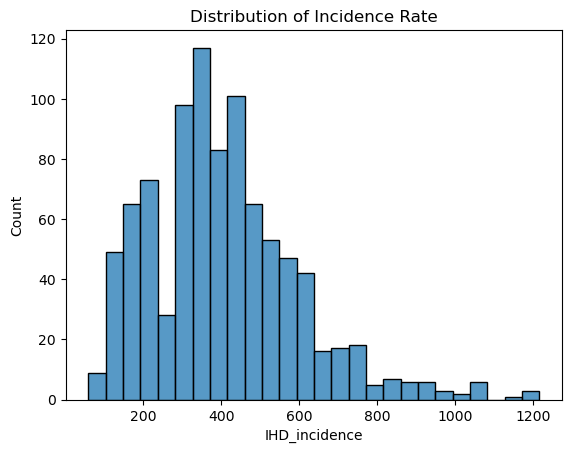

In [62]:
sns.histplot(combined_df['IHD_incidence'])
plt.title('Distribution of Incidence Rate')
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


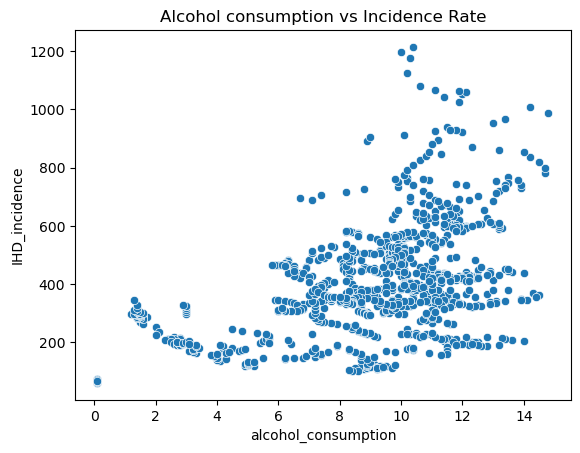

In [66]:
sns.scatterplot(data=combined_df, x='alcohol_consumption', y='IHD_incidence')
plt.title('Alcohol consumption vs Incidence Rate')
plt.show()

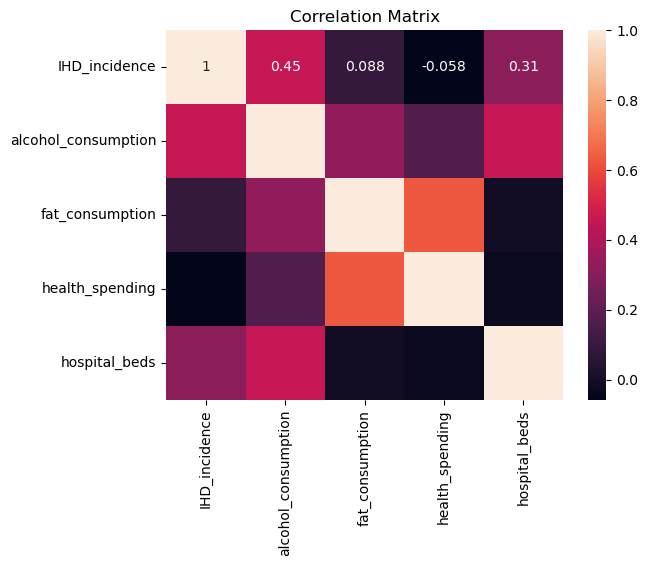

In [67]:
correlation_matrix = combined_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = combined_df.drop('IHD_incidence', axis=1)  # independent variables
y = combined_df['IHD_incidence']  # dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 28922.547865209737
R²: 0.17175329453995292


Best Random Forest MSE: 7627.431160899173
Best Random Forest R²: 0.7815754421228882


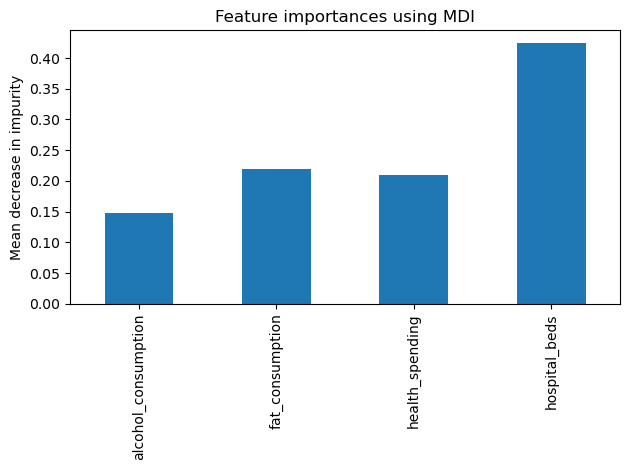

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare the data for modeling
X = combined_df.drop('IHD_incidence', axis=1)  # independent variables
y = combined_df['IHD_incidence']  # dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define a grid of hyperparameters to search
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    # Add other parameters here
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate using the best model
rf_pred = best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Output results
print(f'Best Random Forest MSE: {rf_mse}')
print(f'Best Random Forest R²: {rf_r2}')

# Feature importances
importances = best_model.named_steps['rf'].feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


## OLS regression

In [37]:
fit_model(combined_df)

                            OLS Regression Results                            
Dep. Variable:          IHD_incidence   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     58.41
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           8.38e-25
Time:                        17:30:46   Log-Likelihood:                -385.05
No. Observations:                  83   AIC:                             782.1
Df Residuals:                      77   BIC:                             796.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -255.7704    

In [18]:
combined_df.corr(method='pearson')

,IHD_incidence,alcohol_consumption,fat_consumption,daily_smokers,health_spending,hospital_beds
IHD_incidence,1.000000,0.399790,0.130625,0.253926,-0.088095,0.100847
alcohol_consumption,0.399790,1.000000,0.260390,0.278288,0.116180,0.295528
fat_consumption,0.130625,0.260390,1.000000,-0.090791,0.552515,-0.314521
daily_smokers,0.253926,0.278288,-0.090791,1.000000,-0.442091,0.348774
health_spending,-0.088095,0.116180,0.552515,-0.442091,1.000000,-0.151607
hospital_beds,0.100847,0.295528,-0.314521,0.348774,-0.151607,1.000000


**R-squared**: 0.966, indicating that about 96.6% of the variability in IHD_incidence is explained by the model.

**Adjusted R-squared**: 0.941, which is a high value and suggests a good fit.

**F-statistic**: 38.04 with a Prob (F-statistic) of 0.00213, indicating the model is statistically significant.

**Coefficients**: The coefficients for alcohol_consumption, fat_consumption, and daily_smokers are consistent across all permutations. Alcohol_consumption has a significant positive effect on IHD_incidence (p-value: 0.002), while fat_consumption and daily_smokers are not statistically significant (p-values: 0.819 and 0.204, respectively).